# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:
#time flipped

########### Daten laden ########### time flipped
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PMT_160_120k_Files_gn_tf.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PMT_160_120k_Files_gn_tf.pickle","rb"))
#XMRD = np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/MRD_new.npy")


In [46]:

X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))



In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [59977 60028]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 50.021249114620225


## 120k Set

In [3]:
training_data = list(zip(X, Y))

random.shuffle(training_data)

#for sample in training_data[:20]:
 #   print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

(85000, 10, 16, 2) (20000, 10, 16, 2) (15005, 10, 16, 2)


In [4]:
del X,Y,X1,X2,X3,Y1,Y2,Y3

# Testen der besten Methode

# Both Togahter foreva

In [17]:
dense_layers = [2]
layer_sizes = [130]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="1x1PMT-Combined-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\Combined\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(3,3),strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
            model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu")) 
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(2,2),padding='same',activation="relu"))  
                model.add(Conv2D(layer_size,(2,2),padding='same',activation="relu")) 
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))       
            model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                #model.add(Dropout(0.5))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMT_C+T_tf_PI_120k-60epoch_V2-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            model.summary()
        


            

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 10, 16, 130)       2470      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 16, 130)       152230    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 8, 130)         0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 5, 8, 130)         520       
_________________________________________________________________
dropout_27 (Dropout)         (None, 5, 8, 130)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 5, 8, 130)         67730     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 5, 8, 130)        

In [20]:
XTraining.shape,YTraining.shape,XVal.shape,Yval.shape

((85000, 10, 16, 2), (85000, 2), (20000, 10, 16, 2), (20000, 2))

Train on 85000 samples, validate on 20000 samples
Epoch 1/60
84600/85000 [============================>.] - ETA: 0s - loss: 0.4133 - acc: 0.8104
Epoch 00001: val_acc improved from -inf to 0.87010, saving model to PMT_C+T_tf_PI_120k-60epoch_V2-improvement-val-acc_0.87.model
85000/85000 [==============================] - 16s 193us/sample - loss: 0.4131 - acc: 0.8105 - val_loss: 0.2879 - val_acc: 0.8701
Epoch 2/60
84900/85000 [============================>.] - ETA: 0s - loss: 0.2607 - acc: 0.8908
Epoch 00002: val_acc did not improve from 0.87010
85000/85000 [==============================] - 11s 130us/sample - loss: 0.2607 - acc: 0.8908 - val_loss: 0.3728 - val_acc: 0.8386
Epoch 3/60
84500/85000 [============================>.] - ETA: 0s - loss: 0.2237 - acc: 0.9078
Epoch 00003: val_acc did not improve from 0.87010
85000/85000 [==============================] - 11s 133us/sample - loss: 0.2236 - acc: 0.9079 - val_loss: 0.4474 - val_acc: 0.7987
Epoch 4/60
84800/85000 [======================

Epoch 29/60
84500/85000 [============================>.] - ETA: 0s - loss: 0.0661 - acc: 0.9751
Epoch 00029: val_acc did not improve from 0.93415
85000/85000 [==============================] - 11s 134us/sample - loss: 0.0659 - acc: 0.9752 - val_loss: 0.2276 - val_acc: 0.9238
Epoch 30/60
84700/85000 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9766
Epoch 00030: val_acc did not improve from 0.93415
85000/85000 [==============================] - 11s 129us/sample - loss: 0.0618 - acc: 0.9766 - val_loss: 0.2385 - val_acc: 0.9283
Epoch 31/60
84800/85000 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.9775
Epoch 00031: val_acc did not improve from 0.93415
85000/85000 [==============================] - 11s 132us/sample - loss: 0.0596 - acc: 0.9774 - val_loss: 0.2871 - val_acc: 0.9106
Epoch 32/60
84900/85000 [============================>.] - ETA: 0s - loss: 0.0558 - acc: 0.9788
Epoch 00032: val_acc did not improve from 0.93415
85000/85000 [=============

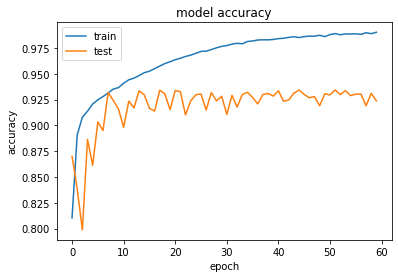

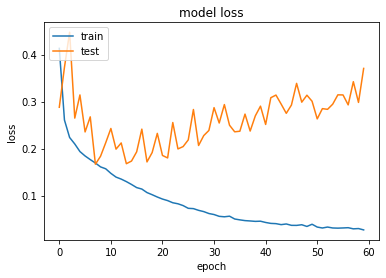

Ende des Versuchs: 


In [21]:
history=model.fit(XTraining,YTraining,
          validation_data=(XVal,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 60)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Evaluate

In [23]:
model = tf.keras.models.load_model("PMT_C+T_tf_PI_120k-60epoch_V2-improvement-val-acc_0.93.model")
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Test score:  0.2853127720905111
Test accuracy:  0.93488836
[[6869  614]
 [ 363 7159]]


[[0.91794735 0.08205265]
 [0.04825844 0.95174156]]


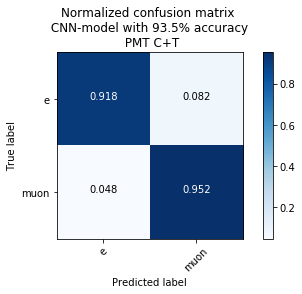

In [24]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93.5% accuracy \n PMT C+T')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Both seperated

In [4]:
XTrainingT= XTraining[:,:,:,1].reshape(85000,10,16,1)
XTestT = XTest[:,:,:,1].reshape(15005,10,16,1)
XValT = XVal[:,:,:,1].reshape(20000,10,16,1)
XTrainingC= XTraining[:,:,:,0].reshape(85000,10,16,1)
XTestC = XTest[:,:,:,0].reshape(15005,10,16,1)
XValC = XVal[:,:,:,0].reshape(20000,10,16,1)

In [9]:

#### Program

#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"
#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))


inputC = tf.keras.Input(shape=XTrainingC.shape[1:], name='C')





#inputMRD = tf.keras.Input(shape=(6), name='MRD')


xC = layers.Conv2D(130, kernel_size=(5,5),activation ='relu',padding='same')(inputC)
xC = layers.Conv2D(130, kernel_size=(5,5),activation ='relu',padding='same')(xC)
xC = layers.MaxPooling2D(2,padding='same')(xC)
xC = layers.BatchNormalization()(xC)
xC = layers.Dropout(0.2)(xC)

xC =layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(xC)
xC =layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(xC)
xC =layers.MaxPooling2D(2)(xC)
xC =layers.BatchNormalization()(xC)
xC =layers.Dropout(0.2)(xC)

xC =layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(xC)
xC =layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(xC)
xC =layers.MaxPooling2D(2)(xC)
xC =layers.Flatten()(xC)
outputC =layers.BatchNormalization()(xC)



inputT = tf.keras.Input(shape=XTrainingT.shape[1:], name='T')

#### Time
x= layers.Conv2D(130, kernel_size=(5,5), strides=(1, 1),activation ='relu',padding='same')(inputT)
x= layers.Conv2D(130, kernel_size=(5,5), strides=(1, 1),activation ='relu',padding='same')(x)
x= layers.MaxPooling2D(2)(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2)(x)


x= layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(x)
x= layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(x)
x= layers.MaxPooling2D(2)(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2)(x)


x= layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(x)
x= layers.Conv2D(130, kernel_size=(3,3), strides=(1, 1),activation ='relu',padding='same')(x)
x= layers.MaxPooling2D(2)(x)
x=layers.Flatten()(x)
outputT= layers.BatchNormalization()(x)
#outputT= layers.Dropout(0.2)(x)




###### Zusammenführung



summary     = layers.concatenate([outputC,outputT])

######

inter  =layers.Flatten()(summary)

inter = layers.Dense(1000, activation='relu')(inter)
inter = layers.BatchNormalization()(inter)
inter = layers.Dropout(0.2)(inter)
inter = layers.Dense(1000, activation='relu')(inter)
inter = layers.BatchNormalization()(inter)
inter = layers.Dropout(0.2)(inter)

outputs = layers.Dense(2, activation='softmax')(inter)




model = tf.keras.Model(inputs=[inputC, inputT], outputs=[outputs], name='Test')

model.summary()


#NVIDIA





Model: "Test"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
C (InputLayer)                  [(None, 10, 16, 1)]  0                                            
__________________________________________________________________________________________________
T (InputLayer)                  [(None, 10, 16, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 10, 16, 130)  3380        C[0][0]                          
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 10, 16, 130)  3380        T[0][0]                          
_______________________________________________________________________________________________

Using TensorFlow backend.


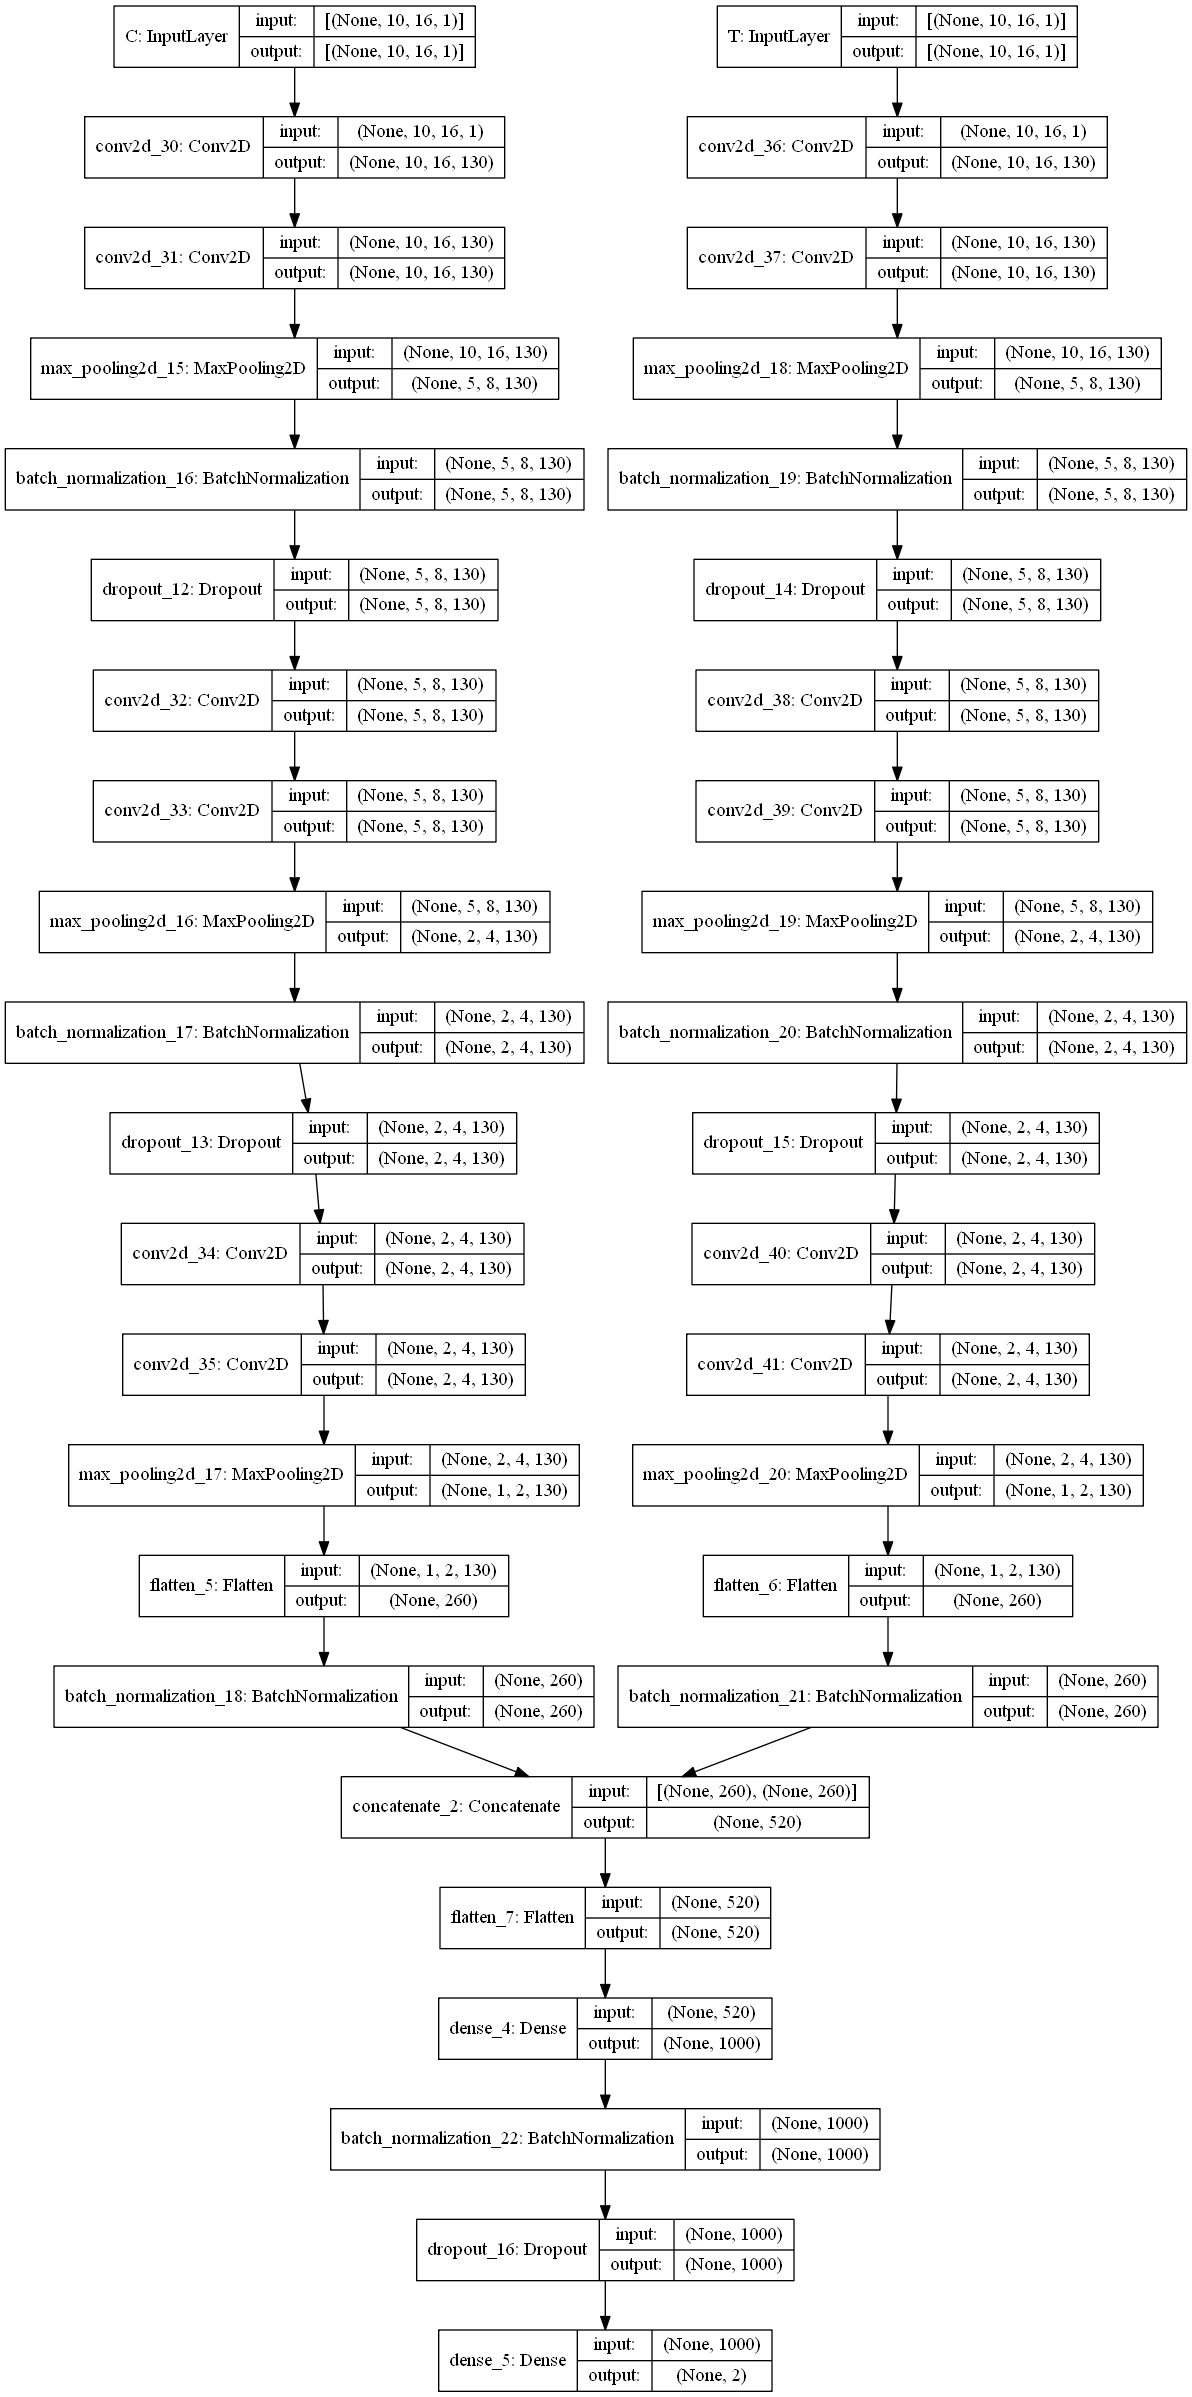

In [10]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
keras.utils.plot_model(model, 'löschen2.png', show_shapes=True)

In [15]:
YTraining.shape

(17000, 2)

Train on 85000 samples, validate on 20000 samples
Epoch 1/60
84800/85000 [============================>.] - ETA: 0s - loss: 0.2410 - acc: 0.8991
Epoch 00001: val_acc improved from -inf to 0.91395, saving model to CNN_PMT_T+C_sep_tf-improvement-val-acc_0.91.model
85000/85000 [==============================] - 21s 244us/sample - loss: 0.2408 - acc: 0.8992 - val_loss: 0.2060 - val_acc: 0.9140
Epoch 2/60
84800/85000 [============================>.] - ETA: 0s - loss: 0.2059 - acc: 0.9150
Epoch 00002: val_acc did not improve from 0.91395
85000/85000 [==============================] - 18s 206us/sample - loss: 0.2058 - acc: 0.9150 - val_loss: 0.3258 - val_acc: 0.8715
Epoch 3/60
84600/85000 [============================>.] - ETA: 0s - loss: 0.1880 - acc: 0.9221
Epoch 00003: val_acc did not improve from 0.91395
85000/85000 [==============================] - 18s 206us/sample - loss: 0.1881 - acc: 0.9220 - val_loss: 0.2167 - val_acc: 0.9075
Epoch 4/60
84900/85000 [============================>.] -

Epoch 59/60
84900/85000 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9958
Epoch 00059: val_acc did not improve from 0.93105
85000/85000 [==============================] - 17s 201us/sample - loss: 0.0118 - acc: 0.9958 - val_loss: 0.6346 - val_acc: 0.9273
Epoch 60/60
84800/85000 [============================>.] - ETA: 0s - loss: 0.0116 - acc: 0.9959
Epoch 00060: val_acc did not improve from 0.93105
85000/85000 [==============================] - 17s 202us/sample - loss: 0.0116 - acc: 0.9960 - val_loss: 0.5767 - val_acc: 0.9291
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


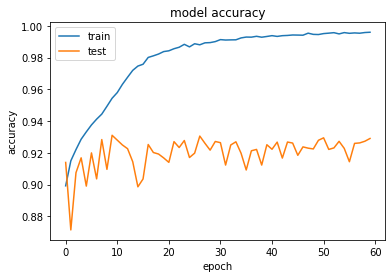

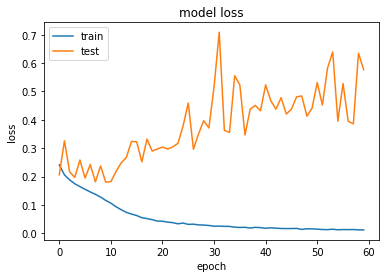

Ende des Versuchs 


In [12]:

#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="CNN_PMT_T+C_sep_tf-improvement-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)


#model Fit

#print(X.shape)
history = model.fit([XTrainingC,XTrainingT],
                    YTraining,
                    batch_size=100,
                    #validation_split=0.2,
                    
                    validation_data=([XValC,XValT],Yval),
                    epochs= 60,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs ")

In [25]:
#Test
model = tf.keras.models.load_model("CNN_PMT_T+C_sep_tf-improvement-val-acc_0.93.model")
score = model.evaluate([XTestC,XTestT], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.18049845183215432
Test accuracy:  0.928024


In [26]:
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict([XTestC,XTestT], batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

[[6872  611]
 [ 469 7053]]


[[0.91834826 0.08165174]
 [0.06235044 0.93764956]]


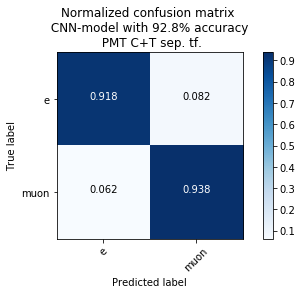

In [27]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 92.8% accuracy \n PMT C+T sep. tf.')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Perceptron

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 2)]       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 320)               0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 320)               1280      
_________________________________________________________________
dense_15 (Dense)             (None, 600)               192600    
_________________________________________________________________
batch_normalization_39 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_32 (Dropout)         (None, 600)               0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 600)               2400  

Epoch 22/60
84864/85000 [============================>.] - ETA: 0s - loss: 0.1574 - acc: 0.9360
Epoch 00022: val_acc improved from 0.87015 to 0.87275, saving model to Perceptron-PMT-PID_tf_gn-val-acc_0.87.model
85000/85000 [==============================] - 5s 63us/sample - loss: 0.1575 - acc: 0.9360 - val_loss: 0.3478 - val_acc: 0.8727
Epoch 23/60
84480/85000 [============================>.] - ETA: 0s - loss: 0.1562 - acc: 0.9361
Epoch 00023: val_acc did not improve from 0.87275
85000/85000 [==============================] - 5s 64us/sample - loss: 0.1562 - acc: 0.9361 - val_loss: 0.3584 - val_acc: 0.8727
Epoch 24/60
84992/85000 [============================>.] - ETA: 0s - loss: 0.1518 - acc: 0.9382
Epoch 00024: val_acc did not improve from 0.87275
85000/85000 [==============================] - 6s 66us/sample - loss: 0.1519 - acc: 0.9382 - val_loss: 0.3959 - val_acc: 0.8635
Epoch 25/60
84736/85000 [============================>.] - ETA: 0s - loss: 0.1444 - acc: 0.9419
Epoch 00025: val_

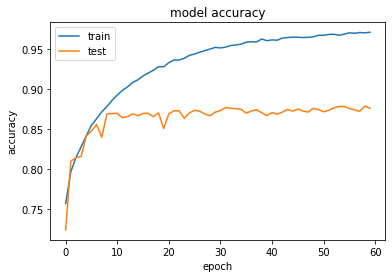

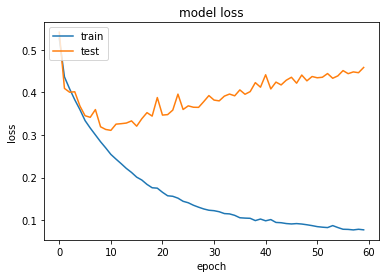

Ende des Versuchs: 


In [28]:
Tiefe = [2]
Batchgrose = [128]
Breite = [600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\ChargePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])
            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="Perceptron-PMT-PID_tf_gn-val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 60)


            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

print("Ende des Versuchs: ")

In [30]:
#Test
model = tf.keras.models.load_model("Perceptron-PMT-PID_tf_gn-val-acc_0.88.model")
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.44612997396315623
Test accuracy:  0.87357545


In [31]:
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

[[6371 1112]
 [ 785 6737]]


[[0.8513965  0.1486035 ]
 [0.10436054 0.89563946]]


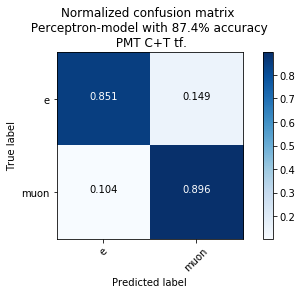

In [32]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 87.4% accuracy \n PMT C+T tf.')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Just Charge

In [69]:
XTraining[:,:,:,0].shape, XTest.shape,XVal.shape

((17000, 10, 16), (4052, 10, 16, 2), (2500, 10, 16, 2))

In [72]:
XTrainingC= XTraining[:,:,:,0].reshape(17000,10,16,1)
XTestC = XTest[:,:,:,0].reshape(4052,10,16,1)
XValC = XVal[:,:,:,0].reshape(2500,10,16,1)

In [75]:
dense_layers = [1,2,3]
layer_sizes = [100,130,150,200]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="JustCharge-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\MuonElectron\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(Dropout(0.4))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(Dropout(0.4))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                #model.add(Dropout(0.5))
            model.add(Dense(32,activation="relu"))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMTOnly_PI_22k_RANDOM-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model.summary()
            history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)
            

            

Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6416 - acc: 0.6194 - val_loss: 0.6116 - val_acc: 0.6476
Epoch 2/30
17000/17000 [==============================] - 1s 42us/sample - loss: 0.5502 - acc: 0.7118 - val_loss: 0.5195 - val_acc: 0.7136
Epoch 3/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.4385 - acc: 0.8027 - val_loss: 0.3809 - val_acc: 0.8400
Epoch 4/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.3805 - acc: 0.8348 - val_loss: 0.3446 - val_acc: 0.8576
Epoch 5/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.3469 - acc: 0.8519 - val_loss: 0.3179 - val_acc: 0.8644
Epoch 6/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.3201 - acc: 0.8678 - val_loss: 0.2920 - val_acc: 0.8848
Epoch 7/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.3101 - acc: 0.8715 - val_loss: 0.2

Epoch 29/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1753 - acc: 0.9270 - val_loss: 0.1799 - val_acc: 0.9212
Epoch 30/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1720 - acc: 0.9285 - val_loss: 0.3119 - val_acc: 0.8708
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6654 - acc: 0.5852 - val_loss: 0.6193 - val_acc: 0.6560
Epoch 2/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.5297 - acc: 0.7282 - val_loss: 0.3622 - val_acc: 0.8456
Epoch 3/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3809 - acc: 0.8320 - val_loss: 0.3184 - val_acc: 0.8728
Epoch 4/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3368 - acc: 0.8558 - val_loss: 0.3321 - val_acc: 0.8560
Epoch 5/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3090 - acc: 0.8673 - val_loss: 0

Epoch 27/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1861 - acc: 0.9235 - val_loss: 0.2058 - val_acc: 0.9128
Epoch 28/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1848 - acc: 0.9231 - val_loss: 0.2118 - val_acc: 0.9116
Epoch 29/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1771 - acc: 0.9284 - val_loss: 0.2050 - val_acc: 0.9132
Epoch 30/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.1747 - acc: 0.9276 - val_loss: 0.2302 - val_acc: 0.9048
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6510 - acc: 0.6079 - val_loss: 0.5970 - val_acc: 0.6692
Epoch 2/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.5189 - acc: 0.7370 - val_loss: 0.4018 - val_acc: 0.8220
Epoch 3/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3811 - acc: 0.8308 - val_loss:

17000/17000 [==============================] - 1s 51us/sample - loss: 0.1822 - acc: 0.9261 - val_loss: 0.1976 - val_acc: 0.9172
Epoch 23/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1742 - acc: 0.9306 - val_loss: 0.1850 - val_acc: 0.9192
Epoch 24/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1736 - acc: 0.9282 - val_loss: 0.1877 - val_acc: 0.9240
Epoch 25/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1735 - acc: 0.9287 - val_loss: 0.1853 - val_acc: 0.9220
Epoch 26/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.1699 - acc: 0.9309 - val_loss: 0.2025 - val_acc: 0.9132
Epoch 27/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1634 - acc: 0.9355 - val_loss: 0.1893 - val_acc: 0.9180
Epoch 28/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1574 - acc: 0.9355 - val_loss: 0.1932 - val_acc: 0.9140
Epoch 29/30
17000/17000 [=======

17000/17000 [==============================] - 1s 47us/sample - loss: 0.2004 - acc: 0.9143 - val_loss: 0.2232 - val_acc: 0.9084
Epoch 21/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.1937 - acc: 0.9198 - val_loss: 0.2624 - val_acc: 0.8892
Epoch 22/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1886 - acc: 0.9207 - val_loss: 0.2158 - val_acc: 0.9128
Epoch 23/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.1911 - acc: 0.9203 - val_loss: 0.2072 - val_acc: 0.9132
Epoch 24/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.1797 - acc: 0.9247 - val_loss: 0.2141 - val_acc: 0.9160
Epoch 25/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.1782 - acc: 0.9243 - val_loss: 0.2561 - val_acc: 0.8936
Epoch 26/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.1729 - acc: 0.9276 - val_loss: 0.2121 - val_acc: 0.9104
Epoch 27/30
17000/17000 [=======

17000/17000 [==============================] - 1s 61us/sample - loss: 0.1766 - acc: 0.9281 - val_loss: 0.1866 - val_acc: 0.9240
Epoch 19/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.1707 - acc: 0.9296 - val_loss: 0.2657 - val_acc: 0.8908
Epoch 20/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.1761 - acc: 0.9265 - val_loss: 0.2080 - val_acc: 0.9048
Epoch 21/30
17000/17000 [==============================] - 1s 65us/sample - loss: 0.1705 - acc: 0.9289 - val_loss: 0.2256 - val_acc: 0.9032
Epoch 22/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.1599 - acc: 0.9362 - val_loss: 0.1843 - val_acc: 0.9204
Epoch 23/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.1630 - acc: 0.9315 - val_loss: 0.1991 - val_acc: 0.9148
Epoch 24/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.1528 - acc: 0.9384 - val_loss: 0.1888 - val_acc: 0.9184
Epoch 25/30
17000/17000 [=======

17000/17000 [==============================] - 1s 53us/sample - loss: 0.2082 - acc: 0.9129 - val_loss: 0.1972 - val_acc: 0.9180
Epoch 17/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2096 - acc: 0.9116 - val_loss: 0.2073 - val_acc: 0.9088
Epoch 18/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2006 - acc: 0.9174 - val_loss: 0.1915 - val_acc: 0.9148
Epoch 19/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2065 - acc: 0.9145 - val_loss: 0.2277 - val_acc: 0.9012
Epoch 20/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.2016 - acc: 0.9152 - val_loss: 0.2608 - val_acc: 0.8832
Epoch 21/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.1876 - acc: 0.9219 - val_loss: 0.2561 - val_acc: 0.8884
Epoch 22/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1891 - acc: 0.9219 - val_loss: 0.1914 - val_acc: 0.9196
Epoch 23/30
17000/17000 [=======

17000/17000 [==============================] - 1s 47us/sample - loss: 0.1597 - acc: 0.9352 - val_loss: 0.2249 - val_acc: 0.9052
Epoch 15/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.1640 - acc: 0.9312 - val_loss: 0.2247 - val_acc: 0.9108
Epoch 16/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.1487 - acc: 0.9399 - val_loss: 0.2281 - val_acc: 0.9088
Epoch 17/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.1419 - acc: 0.9427 - val_loss: 0.2180 - val_acc: 0.9132
Epoch 18/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.1399 - acc: 0.9430 - val_loss: 0.2381 - val_acc: 0.9084
Epoch 19/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.1306 - acc: 0.9454 - val_loss: 0.2288 - val_acc: 0.9116
Epoch 20/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.1315 - acc: 0.9471 - val_loss: 0.2568 - val_acc: 0.8964
Epoch 21/30
17000/17000 [=======

17000/17000 [==============================] - 1s 61us/sample - loss: 0.2316 - acc: 0.9022 - val_loss: 0.2240 - val_acc: 0.9040
Epoch 13/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2200 - acc: 0.9091 - val_loss: 0.2735 - val_acc: 0.8816
Epoch 14/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2149 - acc: 0.9097 - val_loss: 0.2549 - val_acc: 0.8924
Epoch 15/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2133 - acc: 0.9111 - val_loss: 0.2052 - val_acc: 0.9116
Epoch 16/30
17000/17000 [==============================] - 1s 64us/sample - loss: 0.2121 - acc: 0.9128 - val_loss: 0.2058 - val_acc: 0.9168
Epoch 17/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2036 - acc: 0.9145 - val_loss: 0.1997 - val_acc: 0.9220
Epoch 18/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.2114 - acc: 0.9132 - val_loss: 0.2263 - val_acc: 0.9104
Epoch 19/30
17000/17000 [=======

17000/17000 [==============================] - 1s 61us/sample - loss: 0.2225 - acc: 0.9074 - val_loss: 0.2566 - val_acc: 0.8876
Epoch 11/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.2168 - acc: 0.9078 - val_loss: 0.1965 - val_acc: 0.9204
Epoch 12/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2037 - acc: 0.9135 - val_loss: 0.2142 - val_acc: 0.9128
Epoch 13/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.2022 - acc: 0.9154 - val_loss: 0.1955 - val_acc: 0.9184
Epoch 14/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.1992 - acc: 0.9168 - val_loss: 0.1988 - val_acc: 0.9148
Epoch 15/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.1920 - acc: 0.9198 - val_loss: 0.2068 - val_acc: 0.9096
Epoch 16/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.1968 - acc: 0.9182 - val_loss: 0.2123 - val_acc: 0.9100
Epoch 17/30
17000/17000 [=======

17000/17000 [==============================] - 1s 55us/sample - loss: 0.2255 - acc: 0.9044 - val_loss: 0.2266 - val_acc: 0.9104
Epoch 9/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.2114 - acc: 0.9111 - val_loss: 0.2383 - val_acc: 0.9064
Epoch 10/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1938 - acc: 0.9201 - val_loss: 0.2136 - val_acc: 0.9124
Epoch 11/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1865 - acc: 0.9220 - val_loss: 0.2131 - val_acc: 0.9136
Epoch 12/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1746 - acc: 0.9269 - val_loss: 0.2086 - val_acc: 0.9104
Epoch 13/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.1690 - acc: 0.9301 - val_loss: 0.2151 - val_acc: 0.9112
Epoch 14/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.1589 - acc: 0.9352 - val_loss: 0.2099 - val_acc: 0.9192
Epoch 15/30
17000/17000 [========

Epoch 6/30
17000/17000 [==============================] - 1s 69us/sample - loss: 0.2694 - acc: 0.8843 - val_loss: 0.2401 - val_acc: 0.9004
Epoch 7/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.2388 - acc: 0.8981 - val_loss: 0.2324 - val_acc: 0.9008
Epoch 8/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2371 - acc: 0.9000 - val_loss: 0.2561 - val_acc: 0.8856
Epoch 9/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2544 - acc: 0.8952 - val_loss: 0.2733 - val_acc: 0.8816
Epoch 10/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.2166 - acc: 0.9096 - val_loss: 0.2478 - val_acc: 0.8932
Epoch 11/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2158 - acc: 0.9108 - val_loss: 0.2178 - val_acc: 0.9108
Epoch 12/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.2085 - acc: 0.9135 - val_loss: 0.2069 - val_acc: 0.9128
Epoch 13/30
17000/17000 

Epoch 4/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.3337 - acc: 0.8512 - val_loss: 0.2954 - val_acc: 0.8924
Epoch 5/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.3032 - acc: 0.8697 - val_loss: 0.2465 - val_acc: 0.9040
Epoch 6/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2782 - acc: 0.8831 - val_loss: 0.2755 - val_acc: 0.8820
Epoch 7/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2739 - acc: 0.8816 - val_loss: 0.2224 - val_acc: 0.9088
Epoch 8/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2615 - acc: 0.8887 - val_loss: 0.2399 - val_acc: 0.9036
Epoch 9/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2523 - acc: 0.8923 - val_loss: 0.2471 - val_acc: 0.8952
Epoch 10/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2547 - acc: 0.8937 - val_loss: 0.2189 - val_acc: 0.9076
Epoch 11/30
17000/17000 [=

Epoch 2/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.4148 - acc: 0.8110 - val_loss: 0.3737 - val_acc: 0.8224
Epoch 3/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.3123 - acc: 0.8639 - val_loss: 0.2531 - val_acc: 0.8996
Epoch 4/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2816 - acc: 0.8776 - val_loss: 0.2907 - val_acc: 0.8724
Epoch 5/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2544 - acc: 0.8888 - val_loss: 0.2429 - val_acc: 0.8960
Epoch 6/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.2483 - acc: 0.8942 - val_loss: 0.2393 - val_acc: 0.8984
Epoch 7/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2236 - acc: 0.9053 - val_loss: 0.2291 - val_acc: 0.9076
Epoch 8/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2105 - acc: 0.9102 - val_loss: 0.2372 - val_acc: 0.9052
Epoch 9/30
17000/17000 [===

17000/17000 [==============================] - 1s 61us/sample - loss: 0.0832 - acc: 0.9667 - val_loss: 0.2988 - val_acc: 0.9084
Epoch 29/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.0788 - acc: 0.9685 - val_loss: 0.3097 - val_acc: 0.9036
Epoch 30/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.0772 - acc: 0.9691 - val_loss: 0.3021 - val_acc: 0.9020
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 168us/sample - loss: 0.6511 - acc: 0.5996 - val_loss: 0.5724 - val_acc: 0.6848
Epoch 2/30
17000/17000 [==============================] - 1s 69us/sample - loss: 0.4528 - acc: 0.7834 - val_loss: 0.3059 - val_acc: 0.8680
Epoch 3/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.3420 - acc: 0.8515 - val_loss: 0.3366 - val_acc: 0.8552
Epoch 4/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.3103 - acc: 0.8665 - val_loss: 0.2497 - va

17000/17000 [==============================] - 1s 75us/sample - loss: 0.1765 - acc: 0.9272 - val_loss: 0.2215 - val_acc: 0.9048
Epoch 27/30
17000/17000 [==============================] - 1s 78us/sample - loss: 0.1703 - acc: 0.9284 - val_loss: 0.2112 - val_acc: 0.9100
Epoch 28/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1786 - acc: 0.9256 - val_loss: 0.2025 - val_acc: 0.9176
Epoch 29/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.1692 - acc: 0.9302 - val_loss: 0.2722 - val_acc: 0.8804
Epoch 30/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1723 - acc: 0.9265 - val_loss: 0.1897 - val_acc: 0.9200
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 167us/sample - loss: 0.6180 - acc: 0.6468 - val_loss: 0.5155 - val_acc: 0.7392
Epoch 2/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.4001 - acc: 0.8172 - val_loss: 0.3177 - 

17000/17000 [==============================] - 1s 74us/sample - loss: 0.1516 - acc: 0.9385 - val_loss: 0.1906 - val_acc: 0.9164
Epoch 25/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.1500 - acc: 0.9389 - val_loss: 0.2236 - val_acc: 0.9060
Epoch 26/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.1526 - acc: 0.9359 - val_loss: 0.2122 - val_acc: 0.9036
Epoch 27/30
17000/17000 [==============================] - 1s 77us/sample - loss: 0.1479 - acc: 0.9396 - val_loss: 0.2174 - val_acc: 0.9064
Epoch 28/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.1489 - acc: 0.9391 - val_loss: 0.2445 - val_acc: 0.9036
Epoch 29/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1449 - acc: 0.9408 - val_loss: 0.2243 - val_acc: 0.9060
Epoch 30/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.1457 - acc: 0.9416 - val_loss: 0.2238 - val_acc: 0.9048
Train on 17000 samples, validate

In [11]:
dense_layers = [2]
layer_sizes = [130]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="JustCharge-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\MuonElectron\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))   
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMT_Charge_gn_PI_120k_tf-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 10, 16, 130)       3380      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 16, 130)       422630    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 8, 130)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 5, 8, 130)         520       
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 8, 130)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 8, 130)         152230    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 8, 130)        

Train on 85000 samples, validate on 20000 samples
Epoch 1/80
84600/85000 [============================>.] - ETA: 0s - loss: 0.5247 - acc: 0.7231
Epoch 00001: val_acc improved from -inf to 0.73560, saving model to PMT_Charge_gn_PI_120k_tf-improvement-val-acc_0.74.model
85000/85000 [==============================] - 13s 155us/sample - loss: 0.5235 - acc: 0.7238 - val_loss: 0.5358 - val_acc: 0.7356
Epoch 2/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.2630 - acc: 0.8861
Epoch 00002: val_acc improved from 0.73560 to 0.89600, saving model to PMT_Charge_gn_PI_120k_tf-improvement-val-acc_0.90.model
85000/85000 [==============================] - 11s 133us/sample - loss: 0.2628 - acc: 0.8862 - val_loss: 0.2471 - val_acc: 0.8960
Epoch 3/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.2245 - acc: 0.9051
Epoch 00003: val_acc did not improve from 0.89600
85000/85000 [==============================] - 11s 134us/sample - loss: 0.2244 - acc: 0.9051 - val_loss:

Epoch 29/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.0651 - acc: 0.9738
Epoch 00029: val_acc did not improve from 0.93440
85000/85000 [==============================] - 11s 129us/sample - loss: 0.0651 - acc: 0.9738 - val_loss: 0.2926 - val_acc: 0.9132
Epoch 30/80
84400/85000 [============================>.] - ETA: 0s - loss: 0.0627 - acc: 0.9750
Epoch 00030: val_acc did not improve from 0.93440
85000/85000 [==============================] - 11s 129us/sample - loss: 0.0625 - acc: 0.9750 - val_loss: 0.2161 - val_acc: 0.9341
Epoch 31/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.0640 - acc: 0.9744
Epoch 00031: val_acc did not improve from 0.93440
85000/85000 [==============================] - 11s 132us/sample - loss: 0.0641 - acc: 0.9743 - val_loss: 0.3732 - val_acc: 0.9025
Epoch 32/80
84600/85000 [============================>.] - ETA: 0s - loss: 0.0591 - acc: 0.9763
Epoch 00032: val_acc did not improve from 0.93440
85000/85000 [=============

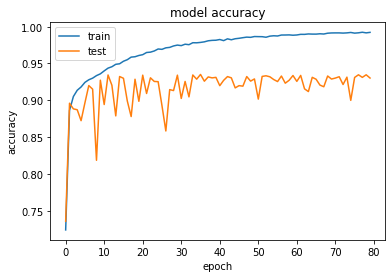

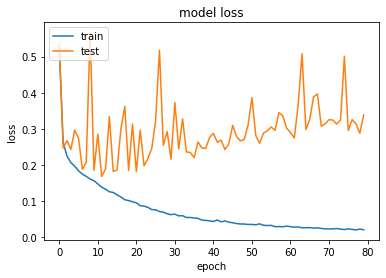

Ende des Versuchs: 


In [12]:
history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 80)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Evaluate

In [15]:
model = tf.keras.models.load_model("PMT_Charge_gn_PI_120k_tf-improvement-val-acc_0.94.model")
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTestC, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Test score:  0.22437739154073805
Test accuracy:  0.93428856
[[6943  594]
 [ 392 7076]]


[[0.9211888  0.0788112 ]
 [0.05249063 0.94750937]]


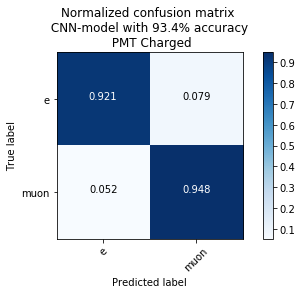

In [16]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93.4% accuracy \n PMT Charged')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Perceptron

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 160)               0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 160)               640       
_________________________________________________________________
dense_16 (Dense)             (None, 2000)              322000    
_________________________________________________________________
batch_normalization_26 (Batc (None, 2000)              8000      
_________________________________________________________________
dropout_20 (Dropout)         (None, 2000)              0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 2000)              8000  

Epoch 20/60
84864/85000 [============================>.] - ETA: 0s - loss: 0.3745 - acc: 0.8241
Epoch 00020: val_acc improved from 0.76205 to 0.78115, saving model to Perceptron-PMT-Charge-MuEl-val_tf_V2_120k-acc_0.78.model
85000/85000 [==============================] - 8s 91us/sample - loss: 0.3744 - acc: 0.8242 - val_loss: 0.4641 - val_acc: 0.7811
Epoch 21/60
84352/85000 [============================>.] - ETA: 0s - loss: 0.3633 - acc: 0.8304
Epoch 00021: val_acc did not improve from 0.78115
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3634 - acc: 0.8303 - val_loss: 0.5497 - val_acc: 0.7414
Epoch 22/60
84864/85000 [============================>.] - ETA: 0s - loss: 0.3549 - acc: 0.8356
Epoch 00022: val_acc did not improve from 0.78115
85000/85000 [==============================] - 8s 89us/sample - loss: 0.3549 - acc: 0.8356 - val_loss: 0.5148 - val_acc: 0.7599
Epoch 23/60
84992/85000 [============================>.] - ETA: 0s - loss: 0.3475 - acc: 0.8398
Epoc

Epoch 50/60
84352/85000 [============================>.] - ETA: 0s - loss: 0.2399 - acc: 0.8924
Epoch 00050: val_acc did not improve from 0.78115
85000/85000 [==============================] - 7s 86us/sample - loss: 0.2401 - acc: 0.8922 - val_loss: 0.9573 - val_acc: 0.7004
Epoch 51/60
84992/85000 [============================>.] - ETA: 0s - loss: 0.2391 - acc: 0.8933
Epoch 00051: val_acc did not improve from 0.78115
85000/85000 [==============================] - 7s 86us/sample - loss: 0.2391 - acc: 0.8933 - val_loss: 0.9880 - val_acc: 0.6955
Epoch 52/60
84352/85000 [============================>.] - ETA: 0s - loss: 0.2361 - acc: 0.8952
Epoch 00052: val_acc did not improve from 0.78115
85000/85000 [==============================] - 7s 86us/sample - loss: 0.2367 - acc: 0.8949 - val_loss: 0.7216 - val_acc: 0.7380
Epoch 53/60
84224/85000 [============================>.] - ETA: 0s - loss: 0.2356 - acc: 0.8955
Epoch 00053: val_acc did not improve from 0.78115
85000/85000 [===================

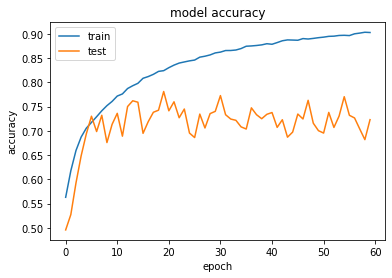

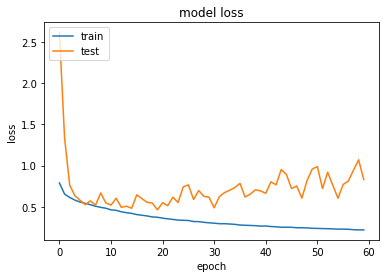

Ende des Versuchs: 


In [19]:
Tiefe = [3]#2
Batchgrose = [128]
Breite = [600] #160
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\ChargePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTrainingC.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])
            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="Perceptron-PMT-Charge-MuEl-val_tf_V2_120k-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)

            history=model.fit(XTrainingC,YTraining,
                              validation_data=(XValC,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 60)


            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

print("Ende des Versuchs: ")

# Evaluate

In [20]:
model = tf.keras.models.load_model("Perceptron-PMT-Charge-MuEl-val_tf_120k-acc_0.80.model")
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTestC, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Test score:  0.4240701823940042
Test accuracy:  0.79666775
[[6321 1216]
 [1835 5633]]


[[0.8386626  0.1613374 ]
 [0.24571505 0.75428495]]


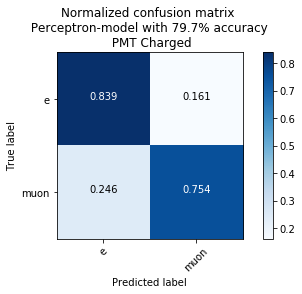

In [22]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 79.7% accuracy \n PMT Charged')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Just Time

In [19]:
dense_layers = [1,2,3]
layer_sizes = [100,130,150,200]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="JustTime-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\Time\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingT.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(Dropout(0.4))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(Dropout(0.4))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                #model.add(Dropout(0.5))
            model.add(Dense(32,activation="relu"))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMTOnly_PI_22k_RANDOM-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model.summary()
            history=model.fit(XTrainingT,YTraining,
          validation_data=(XValT,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)
            

            

Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.5897 - acc: 0.6910 - val_loss: 0.5435 - val_acc: 0.7240
Epoch 2/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.5390 - acc: 0.7276 - val_loss: 0.5087 - val_acc: 0.7456
Epoch 3/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.5060 - acc: 0.7512 - val_loss: 0.4890 - val_acc: 0.7592
Epoch 4/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.4920 - acc: 0.7611 - val_loss: 0.4717 - val_acc: 0.7768
Epoch 5/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.4721 - acc: 0.7751 - val_loss: 0.4834 - val_acc: 0.7648
Epoch 6/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.4648 - acc: 0.7763 - val_loss: 0.4533 - val_acc: 0.7800
Epoch 7/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.4563 - acc: 0.7849 - val_loss: 0.4

Epoch 29/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.3270 - acc: 0.8542 - val_loss: 0.4120 - val_acc: 0.8104
Epoch 30/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.3185 - acc: 0.8611 - val_loss: 0.4224 - val_acc: 0.8044
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6199 - acc: 0.6443 - val_loss: 0.5353 - val_acc: 0.7284
Epoch 2/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.5326 - acc: 0.7352 - val_loss: 0.5247 - val_acc: 0.7376
Epoch 3/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.4956 - acc: 0.7617 - val_loss: 0.4718 - val_acc: 0.7784
Epoch 4/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.4759 - acc: 0.7755 - val_loss: 0.4622 - val_acc: 0.7836
Epoch 5/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.4619 - acc: 0.7843 - val_loss: 0

Epoch 27/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.2945 - acc: 0.8695 - val_loss: 0.4732 - val_acc: 0.7740
Epoch 28/30
17000/17000 [==============================] - 1s 38us/sample - loss: 0.2800 - acc: 0.8793 - val_loss: 0.4774 - val_acc: 0.7940
Epoch 29/30
17000/17000 [==============================] - 1s 42us/sample - loss: 0.2738 - acc: 0.8805 - val_loss: 0.4594 - val_acc: 0.7952
Epoch 30/30
17000/17000 [==============================] - 1s 38us/sample - loss: 0.2697 - acc: 0.8835 - val_loss: 0.4818 - val_acc: 0.7824
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.5877 - acc: 0.6851 - val_loss: 0.5328 - val_acc: 0.7308
Epoch 2/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.5239 - acc: 0.7391 - val_loss: 0.4935 - val_acc: 0.7576
Epoch 3/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.4956 - acc: 0.7589 - val_loss:

Epoch 25/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.3230 - acc: 0.8575 - val_loss: 0.4181 - val_acc: 0.8112
Epoch 26/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3171 - acc: 0.8625 - val_loss: 0.4135 - val_acc: 0.8108
Epoch 27/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.3189 - acc: 0.8594 - val_loss: 0.4132 - val_acc: 0.8080
Epoch 28/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3087 - acc: 0.8648 - val_loss: 0.4370 - val_acc: 0.8012
Epoch 29/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3089 - acc: 0.8658 - val_loss: 0.4276 - val_acc: 0.8012
Epoch 30/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3054 - acc: 0.8661 - val_loss: 0.4192 - val_acc: 0.8100
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 65us/sample - loss: 0.5873 - acc: 0.6900 - val_los

Epoch 23/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.3077 - acc: 0.8666 - val_loss: 0.4216 - val_acc: 0.8124
Epoch 24/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.2976 - acc: 0.8698 - val_loss: 0.4319 - val_acc: 0.8072
Epoch 25/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.2885 - acc: 0.8759 - val_loss: 0.4243 - val_acc: 0.8044
Epoch 26/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.2837 - acc: 0.8766 - val_loss: 0.4225 - val_acc: 0.8088
Epoch 27/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.2789 - acc: 0.8813 - val_loss: 0.4299 - val_acc: 0.8060
Epoch 28/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.2741 - acc: 0.8803 - val_loss: 0.4356 - val_acc: 0.8064
Epoch 29/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.2660 - acc: 0.8833 - val_loss: 0.4305 - val_acc: 0.8116
Epoch 30/30
17000/17

Epoch 21/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.2750 - acc: 0.8817 - val_loss: 0.4856 - val_acc: 0.7968
Epoch 22/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.2615 - acc: 0.8908 - val_loss: 0.4785 - val_acc: 0.7908
Epoch 23/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.2531 - acc: 0.8919 - val_loss: 0.4830 - val_acc: 0.7952
Epoch 24/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.2441 - acc: 0.8955 - val_loss: 0.4999 - val_acc: 0.7924
Epoch 25/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.2357 - acc: 0.9002 - val_loss: 0.5205 - val_acc: 0.7884
Epoch 26/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.2312 - acc: 0.9024 - val_loss: 0.5033 - val_acc: 0.7928
Epoch 27/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.2217 - acc: 0.9071 - val_loss: 0.5299 - val_acc: 0.7956
Epoch 28/30
17000/17

Epoch 19/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3114 - acc: 0.8633 - val_loss: 0.4207 - val_acc: 0.8108
Epoch 20/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2988 - acc: 0.8687 - val_loss: 0.4409 - val_acc: 0.8080
Epoch 21/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2922 - acc: 0.8743 - val_loss: 0.4472 - val_acc: 0.8116
Epoch 22/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2767 - acc: 0.8811 - val_loss: 0.4227 - val_acc: 0.8116
Epoch 23/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.2792 - acc: 0.8812 - val_loss: 0.4381 - val_acc: 0.8068
Epoch 24/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.2681 - acc: 0.8811 - val_loss: 0.4390 - val_acc: 0.8044
Epoch 25/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2656 - acc: 0.8861 - val_loss: 0.4463 - val_acc: 0.8060
Epoch 26/30
17000/17

Epoch 17/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3576 - acc: 0.8369 - val_loss: 0.4103 - val_acc: 0.8048
Epoch 18/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3539 - acc: 0.8406 - val_loss: 0.4009 - val_acc: 0.8104
Epoch 19/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3420 - acc: 0.8475 - val_loss: 0.4129 - val_acc: 0.8108
Epoch 20/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3409 - acc: 0.8462 - val_loss: 0.4104 - val_acc: 0.8156
Epoch 21/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3340 - acc: 0.8501 - val_loss: 0.4063 - val_acc: 0.8152
Epoch 22/30
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3220 - acc: 0.8568 - val_loss: 0.4077 - val_acc: 0.8180
Epoch 23/30
17000/17000 [==============================] - 1s 50us/sample - loss: 0.3214 - acc: 0.8564 - val_loss: 0.4107 - val_acc: 0.8100
Epoch 24/30
17000/17

17000/17000 [==============================] - 1s 58us/sample - loss: 0.4009 - acc: 0.8171 - val_loss: 0.4289 - val_acc: 0.7976
Epoch 13/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3943 - acc: 0.8211 - val_loss: 0.4133 - val_acc: 0.8080
Epoch 14/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.3943 - acc: 0.8234 - val_loss: 0.4085 - val_acc: 0.8024
Epoch 15/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3849 - acc: 0.8257 - val_loss: 0.4327 - val_acc: 0.7960
Epoch 16/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3790 - acc: 0.8299 - val_loss: 0.4050 - val_acc: 0.8040
Epoch 17/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3787 - acc: 0.8293 - val_loss: 0.4058 - val_acc: 0.8112
Epoch 18/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3656 - acc: 0.8379 - val_loss: 0.4242 - val_acc: 0.7968
Epoch 19/30
17000/17000 [=======

17000/17000 [==============================] - 1s 58us/sample - loss: 0.3904 - acc: 0.8229 - val_loss: 0.4182 - val_acc: 0.8060
Epoch 11/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3839 - acc: 0.8262 - val_loss: 0.4138 - val_acc: 0.8096
Epoch 12/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.3724 - acc: 0.8325 - val_loss: 0.4196 - val_acc: 0.8112
Epoch 13/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.3625 - acc: 0.8391 - val_loss: 0.4139 - val_acc: 0.8104
Epoch 14/30
17000/17000 [==============================] - 1s 60us/sample - loss: 0.3530 - acc: 0.8452 - val_loss: 0.4091 - val_acc: 0.8140
Epoch 15/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.3452 - acc: 0.8460 - val_loss: 0.4169 - val_acc: 0.8100
Epoch 16/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.3366 - acc: 0.8504 - val_loss: 0.4133 - val_acc: 0.8096
Epoch 17/30
17000/17000 [=======

17000/17000 [==============================] - 1s 53us/sample - loss: 0.3427 - acc: 0.8502 - val_loss: 0.4378 - val_acc: 0.8008
Epoch 9/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.3210 - acc: 0.8609 - val_loss: 0.4525 - val_acc: 0.8024
Epoch 10/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2927 - acc: 0.8714 - val_loss: 0.4555 - val_acc: 0.7960
Epoch 11/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.2599 - acc: 0.8885 - val_loss: 0.4834 - val_acc: 0.8016
Epoch 12/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.2403 - acc: 0.8971 - val_loss: 0.4963 - val_acc: 0.7944
Epoch 13/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.2041 - acc: 0.9159 - val_loss: 0.5376 - val_acc: 0.7852
Epoch 14/30
17000/17000 [==============================] - 1s 52us/sample - loss: 0.1861 - acc: 0.9234 - val_loss: 0.5340 - val_acc: 0.7936
Epoch 15/30
17000/17000 [========

Epoch 6/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.4267 - acc: 0.8030 - val_loss: 0.4261 - val_acc: 0.8024
Epoch 7/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.4227 - acc: 0.8086 - val_loss: 0.4328 - val_acc: 0.8000
Epoch 8/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.4116 - acc: 0.8115 - val_loss: 0.4403 - val_acc: 0.7952
Epoch 9/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.3988 - acc: 0.8191 - val_loss: 0.4085 - val_acc: 0.8104
Epoch 10/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.3887 - acc: 0.8252 - val_loss: 0.4352 - val_acc: 0.7956
Epoch 11/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.3805 - acc: 0.8275 - val_loss: 0.4118 - val_acc: 0.8028
Epoch 12/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.3738 - acc: 0.8318 - val_loss: 0.4247 - val_acc: 0.8060
Epoch 13/30
17000/17000 

Epoch 4/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.4650 - acc: 0.7781 - val_loss: 0.4394 - val_acc: 0.7940
Epoch 5/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4514 - acc: 0.7898 - val_loss: 0.4321 - val_acc: 0.7956
Epoch 6/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.4392 - acc: 0.7953 - val_loss: 0.4589 - val_acc: 0.7880
Epoch 7/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4265 - acc: 0.7988 - val_loss: 0.4165 - val_acc: 0.8088
Epoch 8/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.4191 - acc: 0.8064 - val_loss: 0.4161 - val_acc: 0.8092
Epoch 9/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.4086 - acc: 0.8124 - val_loss: 0.4485 - val_acc: 0.7864
Epoch 10/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3981 - acc: 0.8148 - val_loss: 0.4080 - val_acc: 0.8132
Epoch 11/30
17000/17000 [=

Epoch 2/30
17000/17000 [==============================] - 1s 54us/sample - loss: 0.5044 - acc: 0.7518 - val_loss: 0.4768 - val_acc: 0.7680
Epoch 3/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.4704 - acc: 0.7734 - val_loss: 0.4637 - val_acc: 0.7752
Epoch 4/30
17000/17000 [==============================] - 1s 56us/sample - loss: 0.4462 - acc: 0.7934 - val_loss: 0.4700 - val_acc: 0.7768
Epoch 5/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4207 - acc: 0.8055 - val_loss: 0.4358 - val_acc: 0.7952
Epoch 6/30
17000/17000 [==============================] - 1s 55us/sample - loss: 0.4099 - acc: 0.8090 - val_loss: 0.4338 - val_acc: 0.7924
Epoch 7/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.3842 - acc: 0.8264 - val_loss: 0.4321 - val_acc: 0.7936
Epoch 8/30
17000/17000 [==============================] - 1s 53us/sample - loss: 0.3626 - acc: 0.8364 - val_loss: 0.4548 - val_acc: 0.7920
Epoch 9/30
17000/17000 [===

17000/17000 [==============================] - 1s 59us/sample - loss: 0.0434 - acc: 0.9851 - val_loss: 1.0593 - val_acc: 0.7796
Epoch 29/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0412 - acc: 0.9851 - val_loss: 0.9822 - val_acc: 0.7972
Epoch 30/30
17000/17000 [==============================] - 1s 57us/sample - loss: 0.0443 - acc: 0.9842 - val_loss: 1.0008 - val_acc: 0.7976
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 149us/sample - loss: 0.5847 - acc: 0.6868 - val_loss: 0.5413 - val_acc: 0.7312
Epoch 2/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.5104 - acc: 0.7489 - val_loss: 0.4700 - val_acc: 0.7736
Epoch 3/30
17000/17000 [==============================] - 1s 65us/sample - loss: 0.4744 - acc: 0.7726 - val_loss: 0.4578 - val_acc: 0.7792
Epoch 4/30
17000/17000 [==============================] - 1s 66us/sample - loss: 0.4509 - acc: 0.7891 - val_loss: 0.4375 - va

17000/17000 [==============================] - 1s 75us/sample - loss: 0.3097 - acc: 0.8623 - val_loss: 0.4188 - val_acc: 0.8164
Epoch 27/30
17000/17000 [==============================] - 1s 76us/sample - loss: 0.3067 - acc: 0.8648 - val_loss: 0.4318 - val_acc: 0.8148
Epoch 28/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.3025 - acc: 0.8635 - val_loss: 0.4553 - val_acc: 0.8144
Epoch 29/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.3012 - acc: 0.8665 - val_loss: 0.4245 - val_acc: 0.8212
Epoch 30/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.2956 - acc: 0.8721 - val_loss: 0.4133 - val_acc: 0.8224
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 3s 151us/sample - loss: 0.5658 - acc: 0.6972 - val_loss: 0.4885 - val_acc: 0.7588
Epoch 2/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.4884 - acc: 0.7629 - val_loss: 0.4812 - 

17000/17000 [==============================] - 1s 72us/sample - loss: 0.2204 - acc: 0.9070 - val_loss: 0.4633 - val_acc: 0.8096
Epoch 25/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.2152 - acc: 0.9089 - val_loss: 0.4740 - val_acc: 0.8144
Epoch 26/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.2089 - acc: 0.9139 - val_loss: 0.5101 - val_acc: 0.7960
Epoch 27/30
17000/17000 [==============================] - 1s 67us/sample - loss: 0.2060 - acc: 0.9141 - val_loss: 0.5247 - val_acc: 0.8024
Epoch 28/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.1903 - acc: 0.9208 - val_loss: 0.5167 - val_acc: 0.8044
Epoch 29/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.1933 - acc: 0.9196 - val_loss: 0.5281 - val_acc: 0.8064
Epoch 30/30
17000/17000 [==============================] - 1s 68us/sample - loss: 0.1837 - acc: 0.9249 - val_loss: 0.5293 - val_acc: 0.8028
Train on 17000 samples, validate

# Time flipped

In [6]:
dense_layers = [3]
layer_sizes = [150]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="Time-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'BeamlikePI\logs\Time\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingT.shape[1:],activation="relu", padding='same'))                                               
            model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu")) 
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMT_Time_Only_FLIPPED_V2-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            model.summary()

W0624 02:34:52.589143 54988 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 16, 150)       3900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 16, 150)       202650    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 8, 150)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 8, 150)         600       
_________________________________________________________________
dropout (Dropout)            (None, 5, 8, 150)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 8, 150)         202650    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 4, 150)         0

W0624 02:35:05.913482 54988 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 85000 samples, validate on 20000 samples
Epoch 1/40
84600/85000 [============================>.] - ETA: 0s - loss: 0.4801 - acc: 0.7716
Epoch 00001: val_acc improved from -inf to 0.67260, saving model to PMT_Time_Only_FLIPPED_V2-improvement-val-acc_0.67.model
85000/85000 [==============================] - 14s 167us/sample - loss: 0.4797 - acc: 0.7717 - val_loss: 0.6243 - val_acc: 0.6726
Epoch 2/40
84600/85000 [============================>.] - ETA: 0s - loss: 0.4190 - acc: 0.8035
Epoch 00002: val_acc improved from 0.67260 to 0.81105, saving model to PMT_Time_Only_FLIPPED_V2-improvement-val-acc_0.81.model
85000/85000 [==============================] - 11s 130us/sample - loss: 0.4189 - acc: 0.8035 - val_loss: 0.4063 - val_acc: 0.8110
Epoch 3/40
84700/85000 [============================>.] - ETA: 0s - loss: 0.4025 - acc: 0.8136
Epoch 00003: val_acc improved from 0.81105 to 0.81965, saving model to PMT_Time_Only_FLIPPED_V2-improvement-val-acc_0.82.model
85000/85000 [==============

84500/85000 [============================>.] - ETA: 0s - loss: 0.1229 - acc: 0.9521
Epoch 00028: val_acc did not improve from 0.86165
85000/85000 [==============================] - 11s 130us/sample - loss: 0.1229 - acc: 0.9521 - val_loss: 0.4256 - val_acc: 0.8607
Epoch 29/40
84700/85000 [============================>.] - ETA: 0s - loss: 0.1153 - acc: 0.9560
Epoch 00029: val_acc did not improve from 0.86165
85000/85000 [==============================] - 11s 130us/sample - loss: 0.1153 - acc: 0.9560 - val_loss: 0.4499 - val_acc: 0.8451
Epoch 30/40
84600/85000 [============================>.] - ETA: 0s - loss: 0.1126 - acc: 0.9567
Epoch 00030: val_acc did not improve from 0.86165
85000/85000 [==============================] - 12s 139us/sample - loss: 0.1126 - acc: 0.9567 - val_loss: 0.4666 - val_acc: 0.8577
Epoch 31/40
84900/85000 [============================>.] - ETA: 0s - loss: 0.1067 - acc: 0.9585
Epoch 00031: val_acc did not improve from 0.86165
85000/85000 [=========================

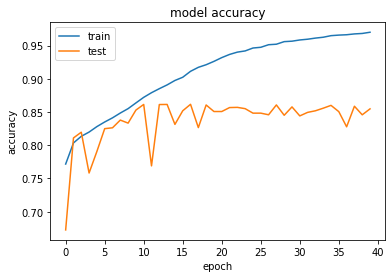

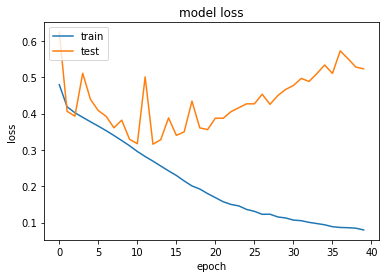

Ende des Versuchs: 


In [7]:
history=model.fit(XTrainingT,YTraining,
          validation_data=(XValT,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 40)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

In [8]:
model = tf.keras.models.load_model("PMT_Time_Only_FLIPPED_V2-improvement-val-acc_0.86.model")
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTestT, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


W0624 02:43:14.202831 54988 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 02:43:14.202831 54988 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 02:43:14.241255 54988 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

Test score:  0.3396889742633892
Test accuracy:  0.86411196
[[6055 1431]
 [ 608 6911]]


[[0.80884317 0.19115683]
 [0.08086182 0.91913818]]


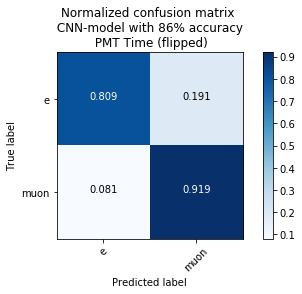

In [9]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 86.4% accuracy \n PMT Time (flipped)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

[[0.81184211 0.18815789]
 [0.11303174 0.88696826]]


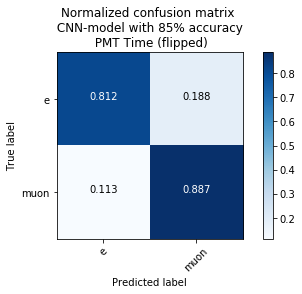

In [11]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 85% accuracy \n PMT Time (flipped)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Perceptron

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 160)               0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 160)               640       
_________________________________________________________________
dense_24 (Dense)             (None, 600)               96600     
_________________________________________________________________
batch_normalization_38 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_26 (Dropout)         (None, 600)               0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 600)               2400  

Epoch 50/60
84480/85000 [============================>.] - ETA: 0s - loss: 0.1621 - acc: 0.9354
Epoch 00050: val_acc did not improve from 0.80835
85000/85000 [==============================] - 6s 76us/sample - loss: 0.1619 - acc: 0.9354 - val_loss: 0.6525 - val_acc: 0.7966
Epoch 51/60
84864/85000 [============================>.] - ETA: 0s - loss: 0.1600 - acc: 0.9354
Epoch 00051: val_acc did not improve from 0.80835
85000/85000 [==============================] - 7s 80us/sample - loss: 0.1599 - acc: 0.9354 - val_loss: 0.6719 - val_acc: 0.7970
Epoch 52/60
84352/85000 [============================>.] - ETA: 0s - loss: 0.1568 - acc: 0.9370
Epoch 00052: val_acc did not improve from 0.80835
85000/85000 [==============================] - 7s 80us/sample - loss: 0.1571 - acc: 0.9370 - val_loss: 0.6996 - val_acc: 0.7957
Epoch 53/60
84736/85000 [============================>.] - ETA: 0s - loss: 0.1559 - acc: 0.9380
Epoch 00053: val_acc did not improve from 0.80835
85000/85000 [===================

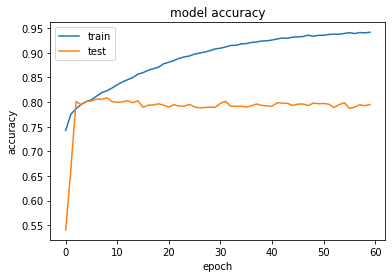

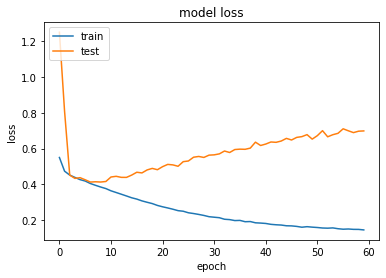

Ende des Versuchs: 


In [24]:
Tiefe = [3]#2
Batchgrose = [128]
Breite = [600] #160
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\ChargePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTrainingT.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])
            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="Perceptron-PMT-Time-MuEl-val_tf_120k-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)

            history=model.fit(XTrainingT,YTraining,
                              validation_data=(XValT,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 60)


            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

print("Ende des Versuchs: ")

# Evaluate

In [25]:
model = tf.keras.models.load_model("Perceptron-PMT-Time-MuEl-val_tf_120k-acc_0.80.model")
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTestT, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Test score:  0.4438371861350413
Test accuracy:  0.7926691
[[5399 2138]
 [ 973 6495]]


[[0.71633276 0.28366724]
 [0.13028923 0.86971077]]


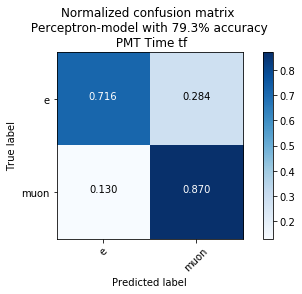

In [26]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 79.3% accuracy \n PMT Time tf')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

## Alt

In [12]:
X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
(85000, 10, 16, 2) (20000, 10, 16, 2) (15005, 10, 16, 2)


In [13]:
XTrainingT= XTraining[:,:,:,1].reshape(85000,10,16,1)
XTestT = XTest[:,:,:,1].reshape(15005,10,16,1)
XValT = XVal[:,:,:,1].reshape(20000,10,16,1)

In [18]:
dense_layers = [3]
layer_sizes = [150]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="Time-1x1PMT-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'BeamlikePI\logs\Time\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(5,5),strides=1, input_shape= XTrainingT.shape[1:],activation="relu", padding='same'))                                               
            model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu")) 
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            filepath="PMT_Time_Only_NOT_FLIPPED_V2-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 10, 16, 150)       3900      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 16, 150)       202650    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 8, 150)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 5, 8, 150)         600       
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 8, 150)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 8, 150)         202650    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 4, 150)        

Train on 85000 samples, validate on 20000 samples
Epoch 1/40
84800/85000 [============================>.] - ETA: 0s - loss: 0.4723 - acc: 0.7762
Epoch 00001: val_acc improved from -inf to 0.74290, saving model to PMT_Time_Only_NOT_FLIPPED_V2-improvement-val-acc_0.74.model
85000/85000 [==============================] - 16s 187us/sample - loss: 0.4722 - acc: 0.7762 - val_loss: 0.5150 - val_acc: 0.7429
Epoch 2/40
84700/85000 [============================>.] - ETA: 0s - loss: 0.4246 - acc: 0.8007
Epoch 00002: val_acc improved from 0.74290 to 0.82180, saving model to PMT_Time_Only_NOT_FLIPPED_V2-improvement-val-acc_0.82.model
85000/85000 [==============================] - 11s 134us/sample - loss: 0.4247 - acc: 0.8006 - val_loss: 0.3911 - val_acc: 0.8218
Epoch 3/40
84900/85000 [============================>.] - ETA: 0s - loss: 0.3932 - acc: 0.8199
Epoch 00003: val_acc did not improve from 0.82180
85000/85000 [==============================] - 12s 137us/sample - loss: 0.3932 - acc: 0.8199 - v

Epoch 28/40
84500/85000 [============================>.] - ETA: 0s - loss: 0.1161 - acc: 0.9544
Epoch 00028: val_acc did not improve from 0.86660
85000/85000 [==============================] - 11s 129us/sample - loss: 0.1159 - acc: 0.9545 - val_loss: 0.4603 - val_acc: 0.8598
Epoch 29/40
84900/85000 [============================>.] - ETA: 0s - loss: 0.1134 - acc: 0.9560
Epoch 00029: val_acc did not improve from 0.86660
85000/85000 [==============================] - 11s 128us/sample - loss: 0.1135 - acc: 0.9560 - val_loss: 0.4713 - val_acc: 0.8548
Epoch 30/40
84800/85000 [============================>.] - ETA: 0s - loss: 0.1072 - acc: 0.9588
Epoch 00030: val_acc did not improve from 0.86660
85000/85000 [==============================] - 11s 128us/sample - loss: 0.1071 - acc: 0.9589 - val_loss: 0.5399 - val_acc: 0.8505
Epoch 31/40
84800/85000 [============================>.] - ETA: 0s - loss: 0.1039 - acc: 0.9602
Epoch 00031: val_acc did not improve from 0.86660
85000/85000 [=============

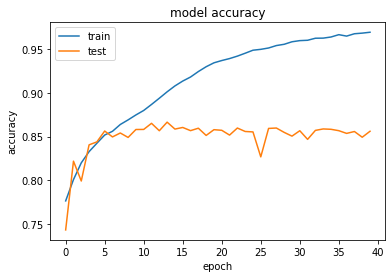

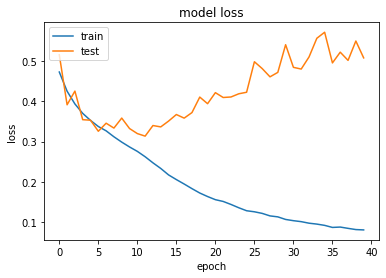

Ende des Versuchs: 


In [19]:
history=model.fit(XTrainingT,YTraining,
          validation_data=(XValT,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 40)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

In [20]:
model = tf.keras.models.load_model("PMT_Time_Only_NOT_FLIPPED_V2-improvement-val-acc_0.87.model")
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTestT, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Test score:  0.36274510880026645
Test accuracy:  0.8565145
[[6094 1509]
 [ 644 6758]]


[[0.80152571 0.19847429]
 [0.08700351 0.91299649]]


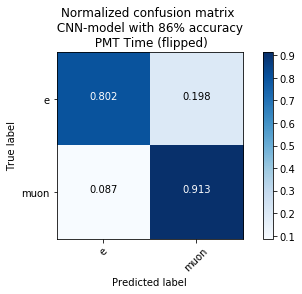

In [21]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 86% accuracy \n PMT Time (flipped)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

[[0.77587794 0.22412206]
 [0.09308295 0.90691705]]


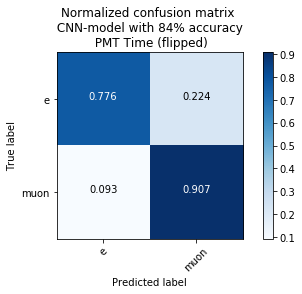

In [17]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n PMT Time (flipped)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

tensorboard --logdir=logs/MuonElectron --host localhost --port 8088

tensorboard --logdir=BeamlikePI/logs/Time --host localhost --port 8088

# Evaluate

In [67]:
XTest.shape

(15005, 10, 16, 2)

In [82]:
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(XTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(YTest,pickle_out,protocol=4)
pickle_out.close()

In [30]:
model = tf.keras.models.load_model("PMT_24_PID_120k-improvement-val-acc_0.84.model")

W0521 13:34:22.750493  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.766009  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.781656  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [77]:
#LAPPD
model = tf.keras.models.load_model("LAPPD(1x1)_PID_120k-improvement-val-acc_0.83.model")

#Combined
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_120k-60epoch_-improvement-val-acc_0.93.model")
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_22k-80epoch-improvement-val-acc_0.92.model")
#Time
#model = tf.keras.models.load_model("PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.81.model")
#Charge
#model = tf.keras.models.load_model("PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.93.model")

In [6]:
len(X)

120005

In [8]:
XTestC = X[:,:,:,0].reshape(120005,10,16,1)

In [12]:

print(XTestC.shape,Y.shape)
for sample in Y[:20]:
    print(sample)

(120005, 10, 16, 1) (120005, 2)
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]


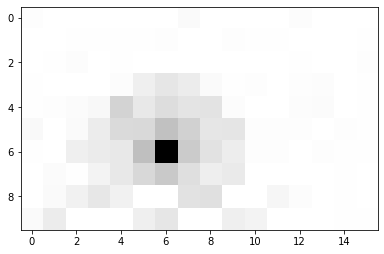

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

## Combined

In [78]:
### LAPPD
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.36467623370204594
Test accuracy:  0.8353882


In [56]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.35680383114329917
Test accuracy:  0.90992105


## Charge

In [13]:
score = model.evaluate(XTestC, Y, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.23812034977390828
Test accuracy:  0.90469563


In [85]:
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.19774321766031458
Test accuracy:  0.92719644


## Time

In [33]:
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4832646434304745
Test accuracy:  0.8005923


# Confusion matrix


In [79]:

#prediction = model.predict(XTestC)
#print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5818 1629]
 [ 841 6717]]


In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## LAPPD

[[0.7812542  0.2187458 ]
 [0.11127282 0.88872718]]


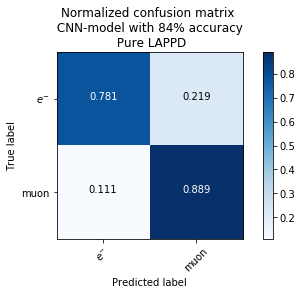

In [80]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n Pure LAPPD')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

## ALL PMTS

[[0.90041109 0.09958891]
 [0.03416399 0.96583601]]


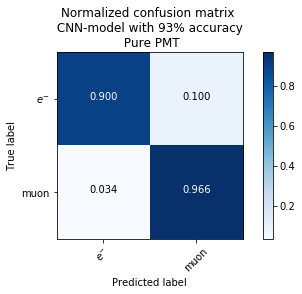

In [58]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93% accuracy \n Pure PMT')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# 24 PMTs

In [62]:
cm2=[[0.79498861,0.20501139],
 [0.11230443,0.88769557]]

[[0.79498861 0.20501139]
 [0.11230443 0.88769557]]


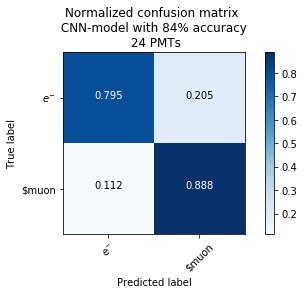

In [81]:
# Reshape into 2 x 2 matrix
#cm = cm.reshape((2,2))
cm2=np.array(cm2)
class_names = [r"$e^{-}$", "$muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n 24 PMTs')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [45]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


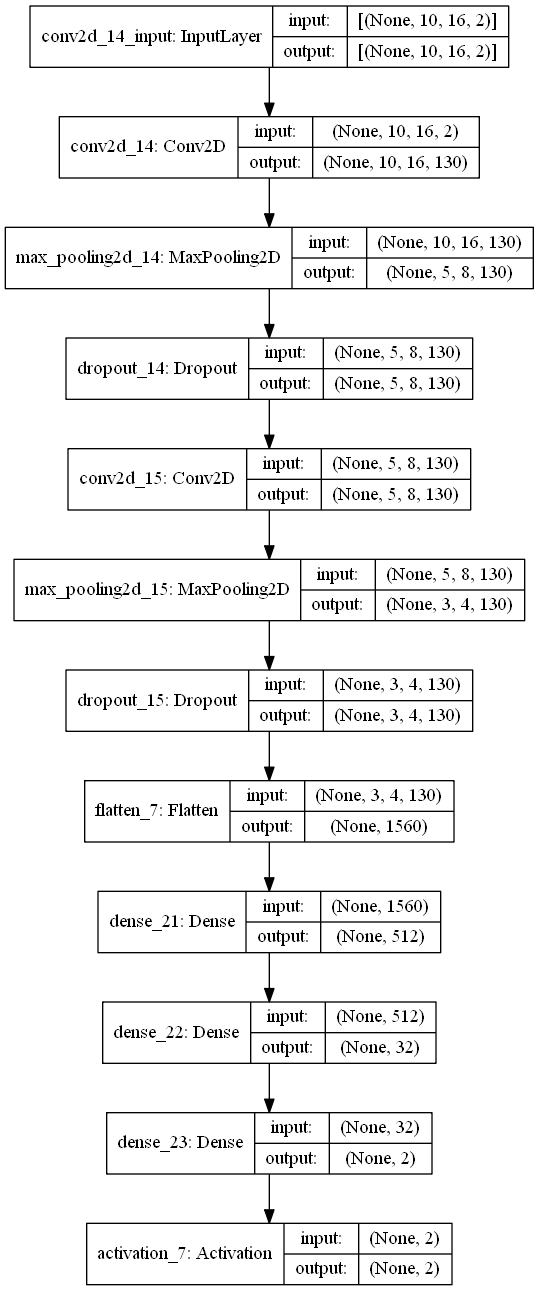

In [46]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


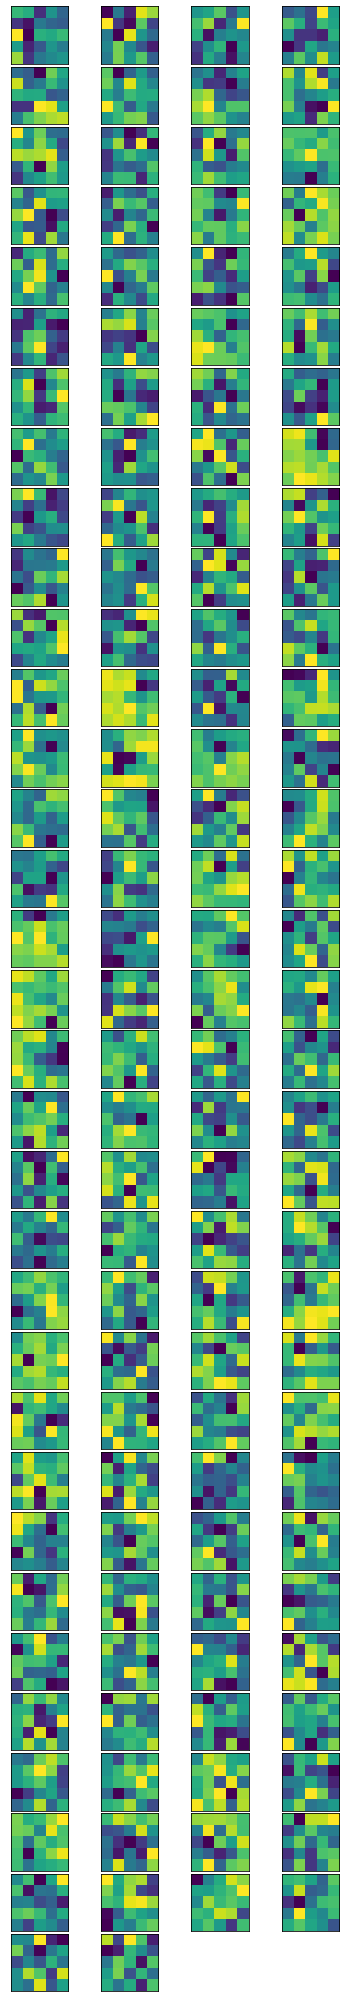

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


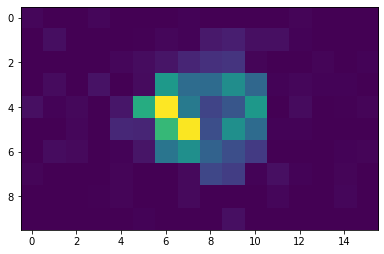

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

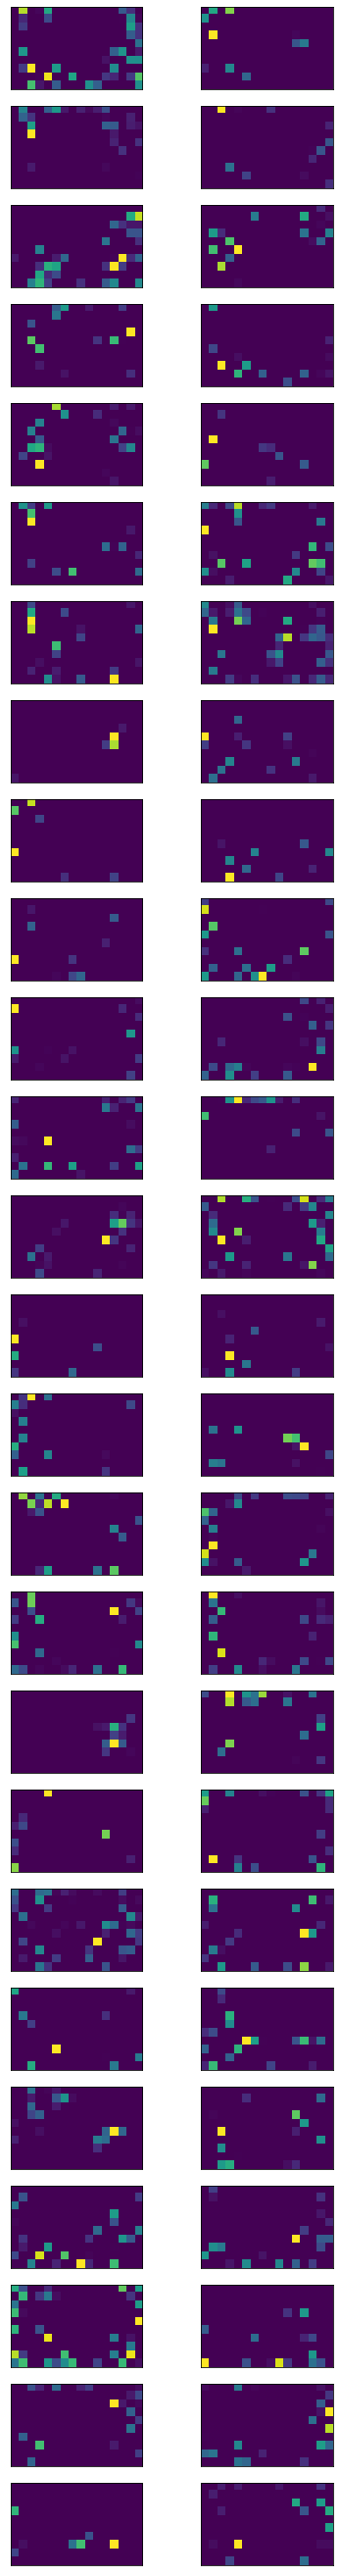

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
